#Heart Disease Prediction
**Certification Project III**

**Context**

Heart Disease is among the most prevalent chronic diseases in the United
States, impacting millions of Americans each year and exerting a significant
financial burden on the economy. In the United States alone, heart disease
claims roughly 647,000 lives each year — making it the leading cause of
death. The buildup of plaques inside larger
coronary arteries, molecular changes associated with aging, chronic
inflammation, high blood pressure, and diabetes are all causes of and risk
factors for heart disease.

The Centers for Disease Control and Prevention has identified high blood
pressure, high blood cholesterol, and smoking as three key risk factors for
heart disease. Roughly half of Americans have at least one of these three
risk factors. The National Heart, Lung, and
Blood Institute highlights a wider array of factors such as Age, Environment
and Occupation, Family History and Genetics, Lifestyle Habits, Other
Medical Conditions, Race or Ethnicity, and Sex for clinicians to use in
diagnosing coronary heart disease. Diagnosis tends to be driven by an
initial survey of these common risk factors followed by bloodwork and
other tests.

**Kaggle link:**
https://www.kaggle.com/datasets/alexteboul/heart-disease-healthindicators-dataset

“AIHealth” is a new age startup laying foundations in the healthcare
domain by solving some of the most prominent problems by using Data
Science and Machine Learning. They are using a lot of open source data to
do a lot of experimentation. You were recently hired as a Data Scientist in
their research team and your role is to create a model to determine
probability for a patient having heart disease or attack.

**Objective**
1. Provide the best performing model to determine probability for a patient
having a heart disease or attack.
2. Providing the most important drivers for a heart disease or attack.

**Data Description**
The data provided consists of the following

**Data Dictionary**

• HeartDiseaseorAttack: Target variable determining whether patient
had prior heart disease or heart attack.

• HighBP: Binary flag determining whether a patient has high blood
pressure.

• HighChol: Binary flag determining whether a patient has high
cholesterol levels.

• BMI: Numeric value representing the Body Mass Index.

• Smoker: Binary flag determining whether a patient smokes or not.

• Diabetes: Binary flag determining whether a patient has diabetes or
not.

• Fruits: Binary flag determining whether a patient consumes fruits in
daily diet or not.

• Veggies : Binary flag determining whether a patient consumes
vegetables in daily diet or not.

• HvyAlcoholConsump: Binary flag determining whether a patient is a
heavy

• consumer of alcohol.

• MentHlth: Numeric value representing mental fitness, ranging from 0
to 30.

• PhysHlth: Numeric value representing physical fitness, ranging from
0 to 30

• Sex: Determining gender of the patient

• Age: The age of the patient binned into buckets between 1-13

• Education: The education level of the patient binned into buckets
between 1-6.

• Income: The income of the patient binned into buckets between 1-8

**Steps and Tasks**

• Import libraries and load dataset

• Exploratory Data Analysis :

➢ Including univariate analysis to understand the distribution of
features.

➢ Including multivariate analysis to determine the correlations
and analysis of target variables.

➢ To determine if new features can be created, based on the
given data.

➢ Layout binary classification experimentation space (i.e.
determine the list of models you would like to experiment
with)

• Using precision-recall curves to determine best threshold

• Publish the performance of all the models on the same hold-out/ test
dataset.

• List out the most important drivers of heart disease or attack.

• Using techniques such as oversampling, undersampling to handle
• class-imbalance.

• Additional: Using model pipeline to create end to end training and
inference pipelines.

1. Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier


# Load Dataset
df = pd.read_csv("heart_disease_health_indicators_dataset.csv",on_bad_lines='skip')  # Update with the actual file path


2. Exploratory Data Analysis (EDA)

 2.1  Univariate Analysis
Analyze the distribution of each feature, especially the target variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31948 entries, 0 to 31947
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartDiseaseorAttack  31948 non-null  float64
 1   HighBP                31948 non-null  float64
 2   HighChol              31948 non-null  float64
 3   BMI                   31948 non-null  float64
 4   Smoker                31948 non-null  float64
 5   Diabetes              31948 non-null  float64
 6   PhysActivity          31948 non-null  float64
 7   Fruits                31948 non-null  float64
 8   Veggies               31948 non-null  float64
 9   HvyAlcoholConsump     31948 non-null  float64
 10  MentHlth              31948 non-null  float64
 11  PhysHlth              31948 non-null  float64
 12  Sex                   31948 non-null  float64
 13  Age                   31948 non-null  float64
 14  Education             31948 non-null  float64
 15  Income             

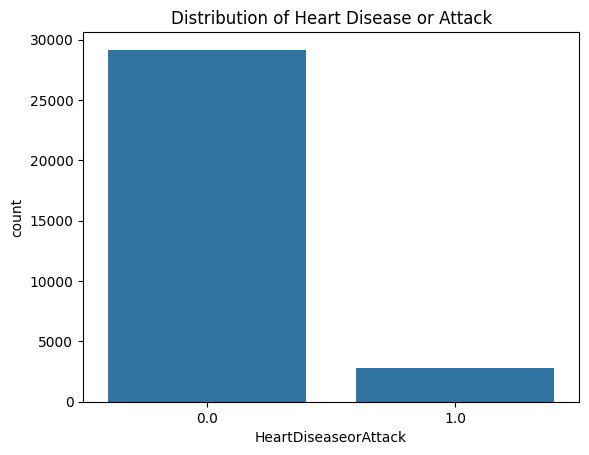

In [ ]:
# Check data information and missing values
df.info()
df.describe()
df.isnull().sum()

# Distribution of the target variable
sns.countplot(data=df, x="HeartDiseaseorAttack")
plt.title("Distribution of Heart Disease or Attack")
plt.show()


2.2 Multivariate Analysis
Examine the relationships between features and the target variable, as well as correlations.

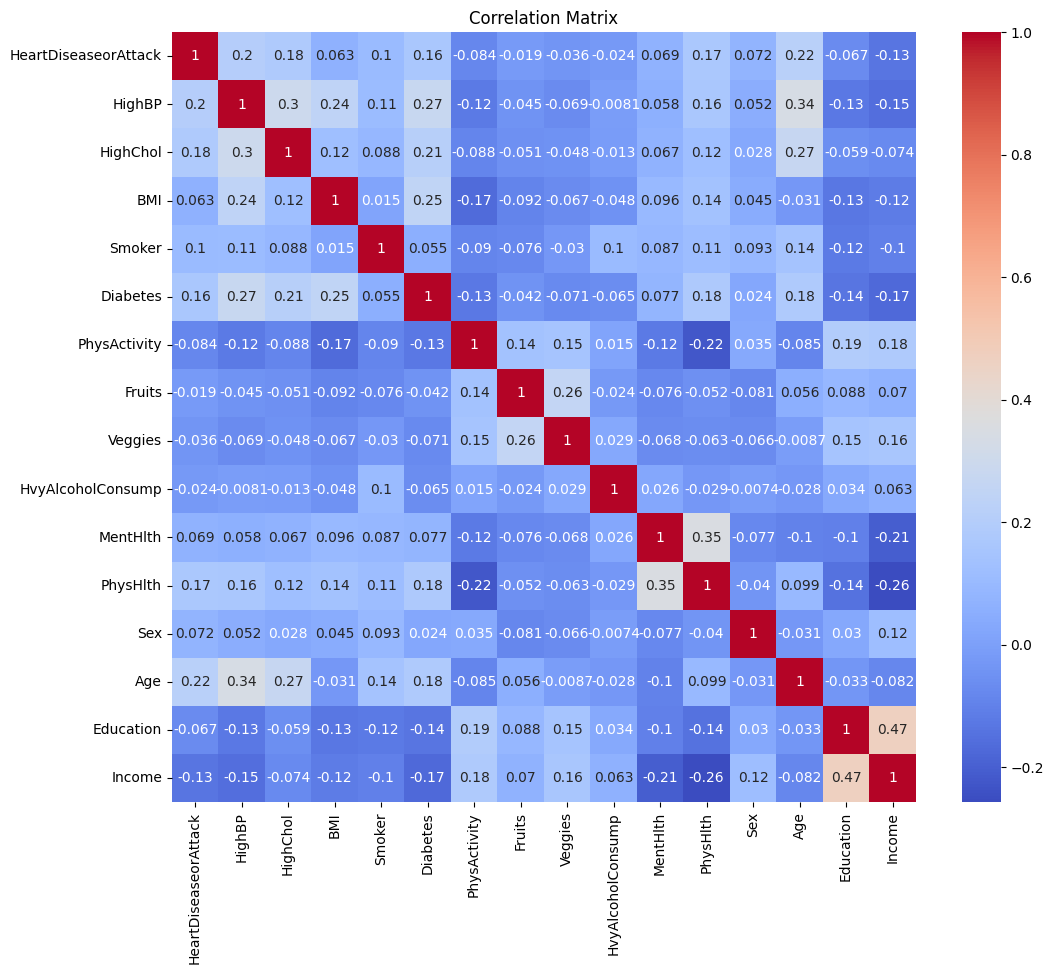

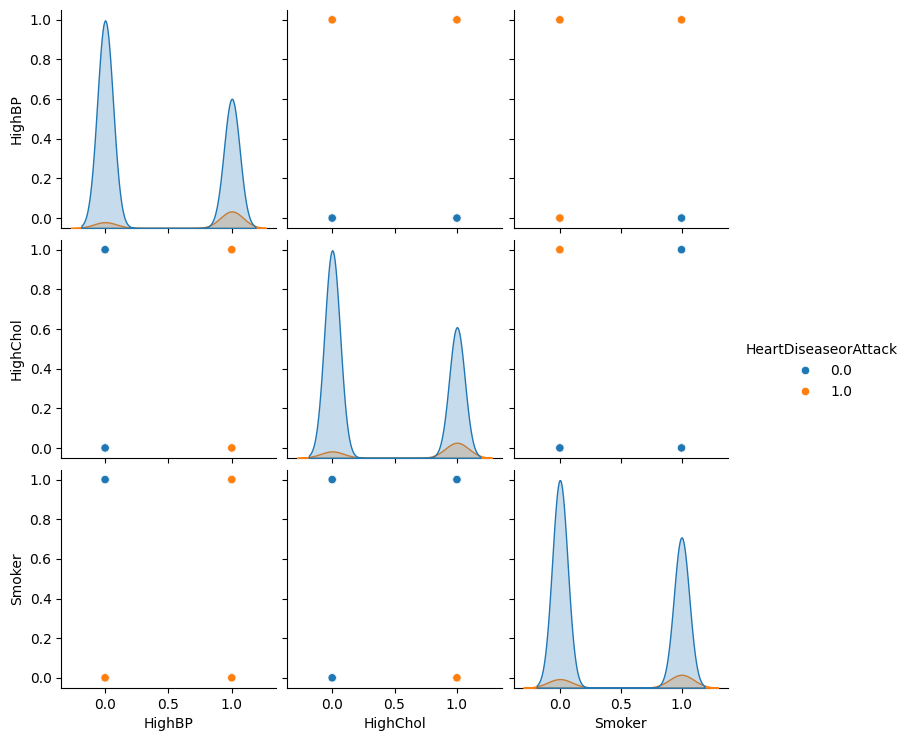

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Compare high blood pressure, cholesterol, smoking with target
sns.pairplot(df, hue="HeartDiseaseorAttack", vars=["HighBP", "HighChol", "Smoker"])
plt.show()


3. Feature Engineering

 3.1 Feature Creation
Check if additional features can be derived, such as combining lifestyle indicators or age groups.

In [ ]:
# Combine lifestyle-related indicators into a single 'UnhealthyLifestyle' score
df['UnhealthyLifestyle'] = df[['HighBP', 'HighChol', 'Smoker', 'HvyAlcoholConsump']].sum(axis=1)

# Binning Mental Health and Physical Health based on median value
df['MentHlthBin'] = pd.cut(df['MentHlth'], bins=[-1, 10, 30], labels=['Good', 'Poor'])
df['PhysHlthBin'] = pd.cut(df['PhysHlth'], bins=[-1, 10, 30], labels=['Good', 'Poor'])


3.2 Handle Class Imbalance
Use techniques like SMOTE and undersampling.

In [ ]:
# Split data
X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]


# Impute missing values for all columns in X
for column in X.columns:  # Iterate through all columns of X
    if X[column].isnull().any():  # Check for missing values in the column
        if pd.api.types.is_numeric_dtype(X[column]):  # If column is numeric
            X[column] = X[column].fillna(X[column].mean())  # Fill with mean
        else:  # If column is not numeric
            X[column] = X[column].fillna(X[column].mode()[0])  # Fill with mode

# Convert categorical features using one-hot encoding
from sklearn.preprocessing import OneHotEncoder
categorical_features = ['MentHlthBin', 'PhysHlthBin'] # Include other categorical features if any

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for SMOTE compatibility

# Fit the encoder on the categorical features and transform them
encoded_features = encoder.fit_transform(X[categorical_features])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded features to X
X = X.drop(categorical_features, axis=1)
X = pd.concat([X, encoded_df], axis=1)

# Apply SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


4. Experimentation with Different Models

 4.1 Define Model Selection
List models for binary classification.

In [ ]:

#from sklearn.model_selection import train_test_split # Import the train_test_split function

# Load your dataset (replace with your own dataset)
# Assuming data is preprocessed and split into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a dictionary of models for binary classification
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),

}

# Initialize a dictionary to hold cross-validation results
results = {"Model": [], "Accuracy": [], "F1 Score": []}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["F1 Score"].append(f1)

# Display results in a DataFrame
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("\nModel Performance Comparison:")
print(results_df)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVM...

Model Performance Comparison:
                 Model  Accuracy  F1 Score
1        Decision Tree  0.846792  0.202119
0  Logistic Regression  0.915180  0.102649
2        Random Forest  0.912363  0.096774
3                  SVM  0.915962  0.000000


4.2 Model Performance with Precision-Recall Curves
Precision-recall is helpful for imbalanced datasets.

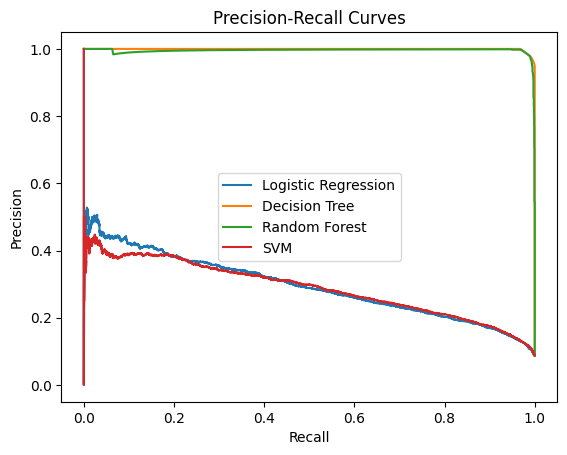

In [ ]:
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_proba = model.predict_proba(X)[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_proba)

    plt.plot(recall, precision, label=name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()



5. Evaluate Best Model on Test Set

In [ ]:
# Split original data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the selected model
best_model = RandomForestClassifier()  # Assuming RandomForest performed best in CV
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5831
         1.0       0.31      0.04      0.07       559

    accuracy                           0.91      6390
   macro avg       0.61      0.52      0.51      6390
weighted avg       0.86      0.91      0.87      6390

ROC AUC Score: 0.7923813532568663


6. Identify Most Important Drivers of Heart Disease
For models like Random Forest or Decision Tree, feature importance scores indicate the impact of each feature.

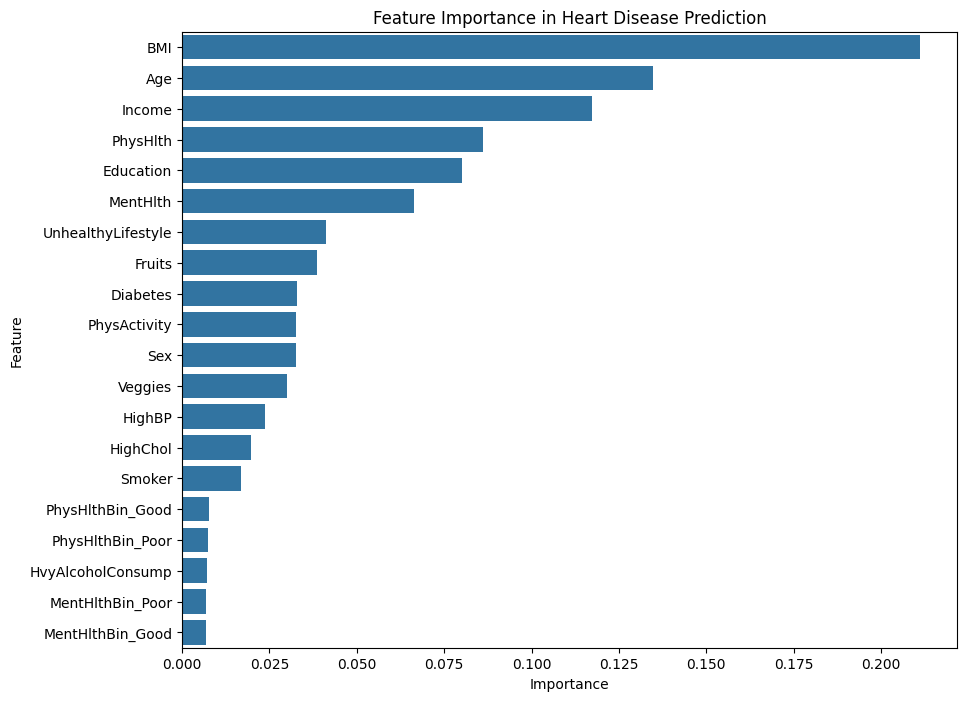

In [ ]:
# Feature importance from RandomForest
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance in Heart Disease Prediction")
plt.show()


7. Build Model Pipeline for Reusability
Using a pipeline to preprocess data and fit models streamlines model training.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline with preprocessor and model
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), X.select_dtypes(include=np.number).columns)
])

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier())
])

# Fit and evaluate pipeline
pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)
print(classification_report(y_test, y_pred_pipe))


              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5831
         1.0       0.37      0.04      0.08       559

    accuracy                           0.91      6390
   macro avg       0.64      0.52      0.51      6390
weighted avg       0.87      0.91      0.88      6390



**Summary**

This approach allows you to:

1.  Explore and preprocess data
2.  Use feature engineering to enhance model accuracy
3.  Address class imbalance
4.  Test multiple models to select the best one
5.  Assess the most important features for heart disease risk





